<a href="https://colab.research.google.com/github/deepan1234567/Kalvium-Task/blob/main/Kalvium.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd

# Load the data
file_path = '/election_results_2024.csv'
df = pd.read_csv(file_path)

# Display the first few rows to verify the data
print(df.head())

# Display the column names
print(df.columns)


       Constituency  Const. No.    Leading Candidate  \
0             AJMER          13  BHAGIRATH CHOUDHARY   
1             ALWAR           8      BHUPENDER YADAV   
2            AMBALA           1       VARUN CHAUDHRY   
3  ANANTNAG-RAJOURI           3     MIAN ALTAF AHMAD   
4         ARAKKONAM           7    S JAGATHRATCHAKAN   

                         Leading Party    Trailing Candidate  \
0               Bharatiya Janata Party  RAMCHANDRA CHOUDHARY   
1               Bharatiya Janata Party           LALIT YADAV   
2             Indian National Congress         BANTO KATARIA   
3  Jammu & Kashmir National Conference        MEHBOOBA MUFTI   
4            Dravida Munnetra Kazhagam             L VIJAYAN   

                             Trailing Party  Margin           Status  
0                  Indian National Congress  329991  Result Declared  
1                  Indian National Congress   48282  Result Declared  
2                    Bharatiya Janata Party   49036  Result Decla

Inspect the data


In [3]:
# Get basic information about the dataset
print(df.info())

# Check for missing values
print(df.isnull().sum())

# Get summary statistics
print(df.describe())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 543 entries, 0 to 542
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Constituency        543 non-null    object
 1   Const. No.          543 non-null    int64 
 2   Leading Candidate   543 non-null    object
 3   Leading Party       543 non-null    object
 4   Trailing Candidate  542 non-null    object
 5   Trailing Party      542 non-null    object
 6   Margin              543 non-null    object
 7   Status              543 non-null    object
dtypes: int64(1), object(7)
memory usage: 34.1+ KB
None
Constituency          0
Const. No.            0
Leading Candidate     0
Leading Party         0
Trailing Candidate    1
Trailing Party        1
Margin                0
Status                0
dtype: int64
       Const. No.
count  543.000000
mean    18.178637
std     16.427840
min      1.000000
25%      6.000000
50%     14.000000
75%     25.000000
max     80.

Key Insight - Total seats won by each party

       Constituency  Const. No.    Leading Candidate  \
0             AJMER          13  BHAGIRATH CHOUDHARY   
1             ALWAR           8      BHUPENDER YADAV   
2            AMBALA           1       VARUN CHAUDHRY   
3  ANANTNAG-RAJOURI           3     MIAN ALTAF AHMAD   
4         ARAKKONAM           7    S JAGATHRATCHAKAN   

                         Leading Party    Trailing Candidate  \
0               Bharatiya Janata Party  RAMCHANDRA CHOUDHARY   
1               Bharatiya Janata Party           LALIT YADAV   
2             Indian National Congress         BANTO KATARIA   
3  Jammu & Kashmir National Conference        MEHBOOBA MUFTI   
4            Dravida Munnetra Kazhagam             L VIJAYAN   

                             Trailing Party  Margin           Status  
0                  Indian National Congress  329991  Result Declared  
1                  Indian National Congress   48282  Result Declared  
2                    Bharatiya Janata Party   49036  Result Decla

<ipython-input-15-11f5eb29ba30>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=party_seats.index, y=party_seats.values, palette='viridis')


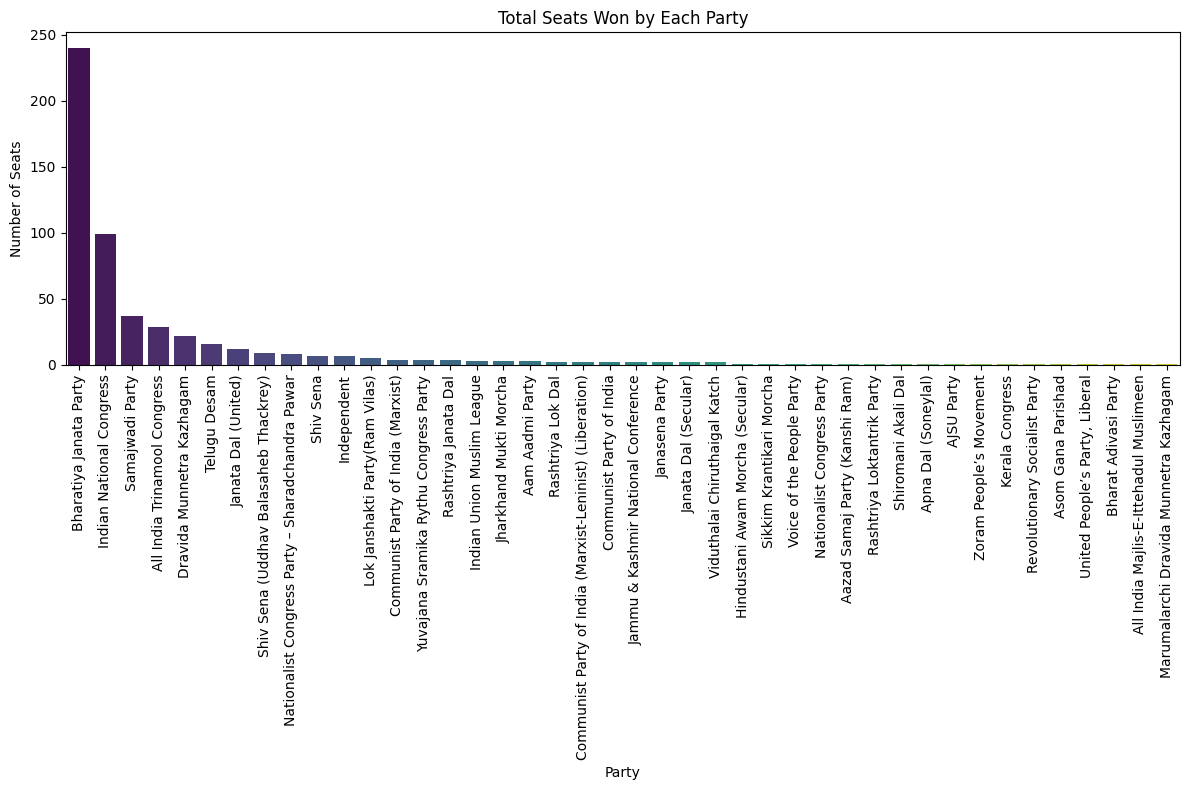

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
file_path = '/election_results_2024.csv'
df = pd.read_csv(file_path)

# Display the first few rows to verify the data
print(df.head())

# Display the column names
print(df.columns)

# Adjust the column names based on your dataset
party_column = 'Leading Party'  # Replace with the actual column name for party

# Insight 1: Total Seats Won by Each Party
party_seats = df[party_column].value_counts()
print("Total Seats Won by Each Party:")
print(party_seats)

plt.figure(figsize=(12, 8))
sns.barplot(x=party_seats.index, y=party_seats.values, palette='viridis')
plt.title('Total Seats Won by Each Party')
plt.xlabel('Party')
plt.ylabel('Number of Seats')
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig('total_seats_by_party.png')
plt.show()





Insight 2: Proportion of Seats Won by Major Parties

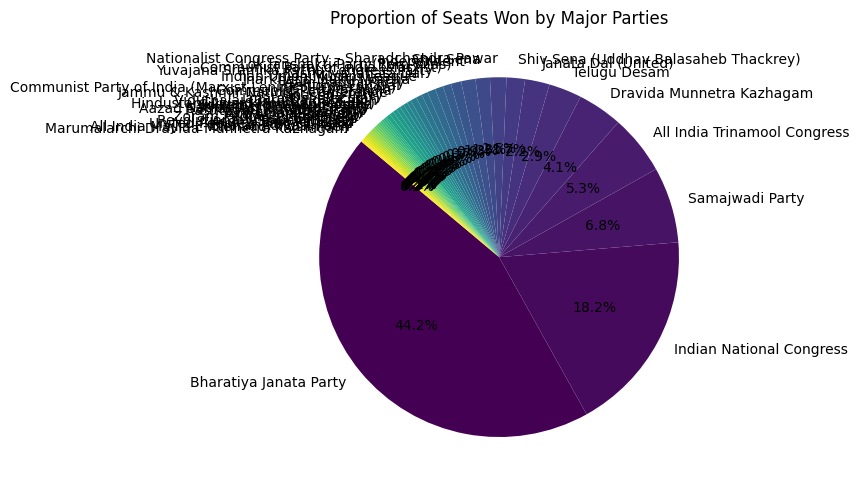

In [16]:
plt.figure(figsize=(8, 8))
party_seats.plot(kind='pie', autopct='%1.1f%%', startangle=140, colormap='viridis')
plt.title('Proportion of Seats Won by Major Parties')
plt.ylabel('')
plt.tight_layout()
plt.savefig('proportion_of_seats_by_party.png')
plt.show()

Insight 3: Top Performing States-constituency by Party

In [18]:
state_column = 'Constituency'  # Replace with the actual column name for state
top_states_by_party = df.groupby([state_column, party_column]).size().unstack().fillna(0)
top_performing_states = top_states_by_party.idxmax()
print("Top Performing States by Party:")
print(top_performing_states)

Top Performing States by Party:
Leading Party
AJSU Party                                                           Giridih
Aam Aadmi Party                                               Anandpur Sahib
Aazad Samaj Party (Kanshi Ram)                                        Nagina
All India Majlis-E-Ittehadul Muslimeen                             Hyderabad
All India Trinamool Congress                                        Arambagh
Apna Dal (Soneylal)                                                 Mirzapur
Asom Gana Parishad                                                   Barpeta
Bharat Adivasi Party                                                BANSWARA
Bharatiya Janata Party                                           Maharajganj
Communist Party of India                                        NAGAPATTINAM
Communist Party of India (Marxist)                                   Alathur
Communist Party of India (Marxist-Leninist) (Liberation)               Arrah
Dravida Munnetra Kazhagam     

 Insight 4: State-wise Seat Distribution

In [19]:
state_seats = df[state_column].value_counts()
print("State-wise Seat Distribution:")
print(state_seats)

State-wise Seat Distribution:
Constituency
Maharajganj        2
Aurangabad         2
NAGAUR             1
Munger             1
Murshidabad        1
                  ..
Fatehgarh Sahib    1
Farrukhabad        1
Faridkot           1
Faizabad           1
Zahirabad          1
Name: count, Length: 541, dtype: int64


<ipython-input-28-ac6c9ad2f5fe>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=state_seats.index, y=state_seats.values, palette='viridis')


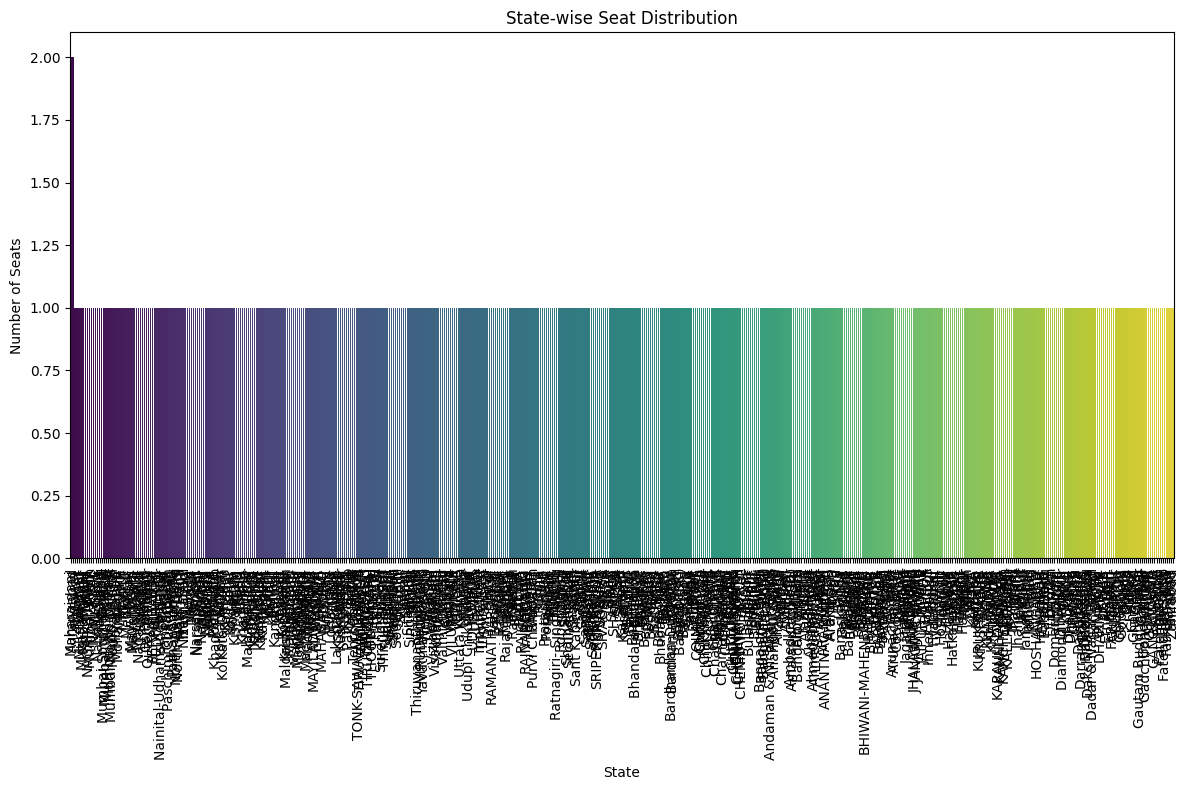

In [28]:
plt.figure(figsize=(12, 8))
sns.barplot(x=state_seats.index, y=state_seats.values, palette='viridis')
plt.title('State-wise Seat Distribution')
plt.xlabel('State')
plt.ylabel('Number of Seats')
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig('state_seat_distribution.png')
plt.show()

In [ ]:
Insight 5-Margin of Victory Analysis

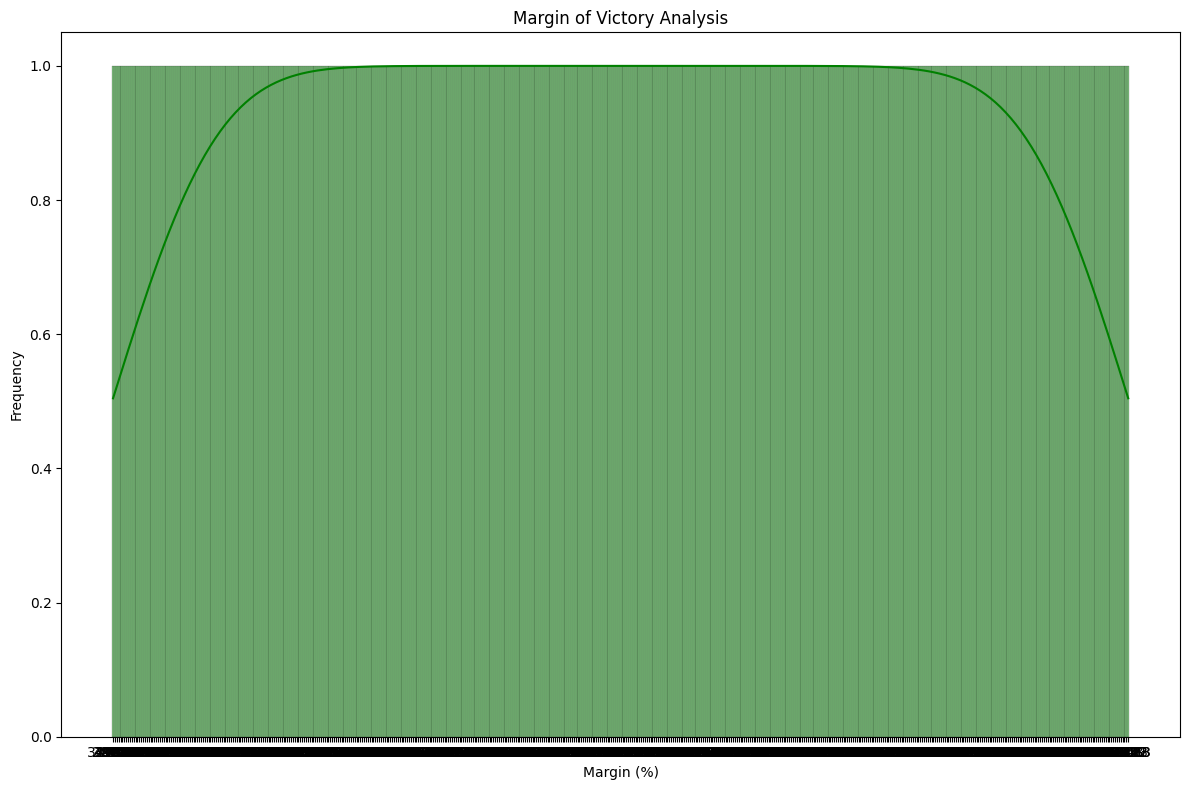

In [34]:
plt.figure(figsize=(12, 8))
sns.histplot(df['Margin'], bins=20, kde=True, color='green')
plt.title('Margin of Victory Analysis')
plt.xlabel('Margin (%)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.savefig('margin_of_victory.png')
plt.show()


Insight 6 - Winning vs. Trailing Candidates

Winning vs. Trailing Candidates:
Status
Result Declared    542
Uncontested          1
Name: count, dtype: int64


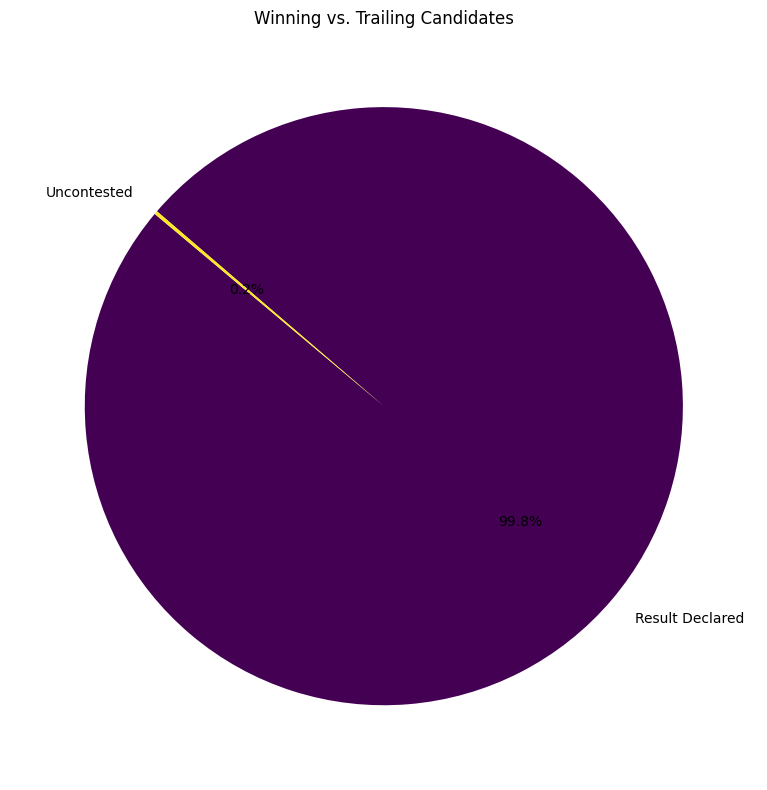

In [35]:
# Assuming 'Status' column indicates 'Won' or 'Trailing'
status_column = 'Status'  # Replace with actual column name if different
status_distribution = df[status_column].value_counts()

print("Winning vs. Trailing Candidates:")
print(status_distribution)

plt.figure(figsize=(8, 8))
status_distribution.plot(kind='pie', autopct='%1.1f%%', startangle=140, colormap='viridis')
plt.title('Winning vs. Trailing Candidates')
plt.ylabel('')
plt.tight_layout()
plt.savefig('winning_vs_trailing_candidates.png')
plt.show()


Insight 7 - Performance of Trailing Parties

Performance of Trailing Parties:
Trailing Party
Indian National Congress                                    167
Bharatiya Janata Party                                      153
All India Anna Dravida Munnetra Kazhagam                     24
Samajwadi Party                                              24
Biju Janata Dal                                              21
Yuvajana Sramika Rythu Congress Party                        21
Rashtriya Janata Dal                                         18
Communist Party of India (Marxist)                           17
All India Trinamool Congress                                 13
Aam Aadmi Party                                              13
Shiv Sena (Uddhav Balasaheb Thackrey)                        10
Shiv Sena                                                     8
Independent                                                   5
Communist Party of India                                      4
Janata Dal (United)                                     

<ipython-input-36-962fb286ea22>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=trailing_party_performance.index, y=trailing_party_performance.values, palette='viridis')


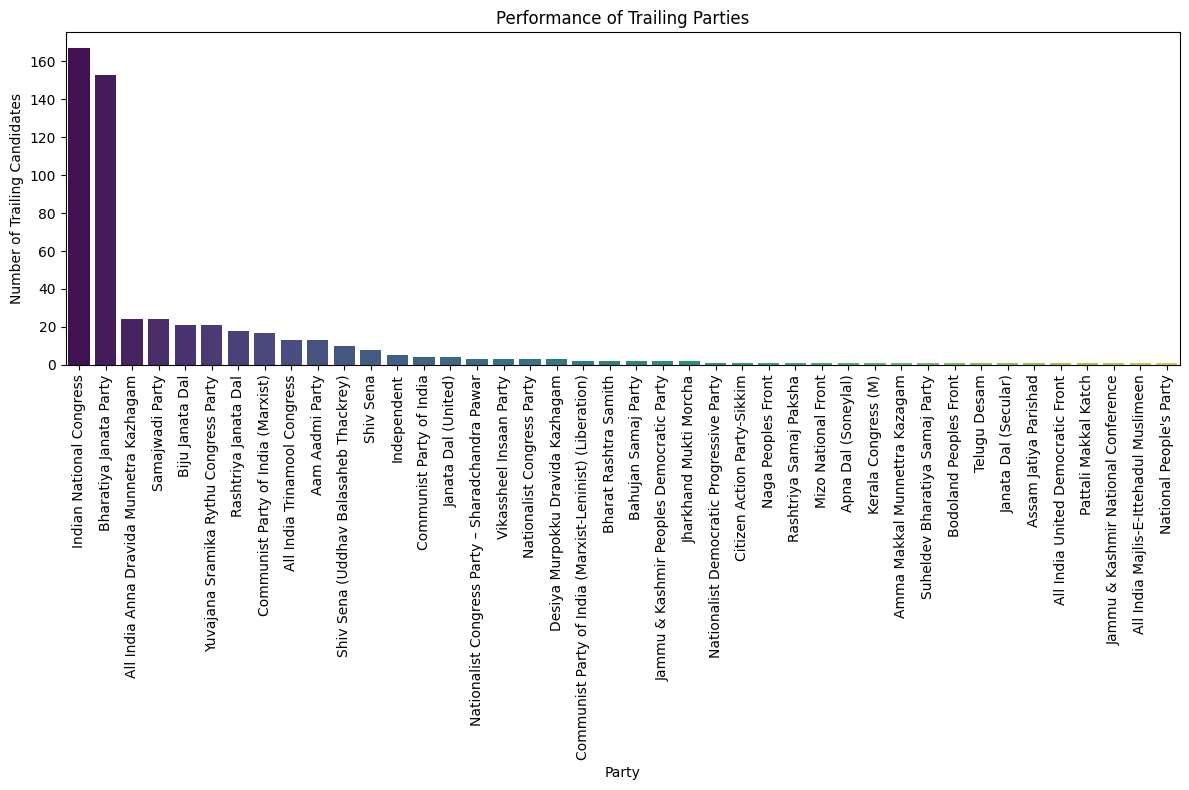

In [36]:
# Assuming 'Trailing Party' column exists
trailing_party_column = 'Trailing Party'  # Replace with actual column name if different
trailing_party_performance = df[trailing_party_column].value_counts()

print("Performance of Trailing Parties:")
print(trailing_party_performance)

plt.figure(figsize=(12, 8))
sns.barplot(x=trailing_party_performance.index, y=trailing_party_performance.values, palette='viridis')
plt.title('Performance of Trailing Parties')
plt.xlabel('Party')
plt.ylabel('Number of Trailing Candidates')
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig('trailing_party_performance.png')
plt.show()


Insight 8 - Trailing Candidates by Party

Number of Trailing Candidates by Party:
Trailing Party
Aam Aadmi Party                                              13
All India Anna Dravida Munnetra Kazhagam                     24
All India Majlis-E-Ittehadul Muslimeen                        1
All India Trinamool Congress                                 13
All India United Democratic Front                             1
Amma Makkal Munnettra Kazagam                                 1
Apna Dal (Soneylal)                                           1
Assam Jatiya Parishad                                         1
Bahujan Samaj Party                                           2
Bharat Rashtra Samith                                         2
Bharatiya Janata Party                                      153
Biju Janata Dal                                              21
Bodoland Peoples Front                                        1
Citizen Action Party-Sikkim                                   1
Communist Party of India                         

<ipython-input-40-df9a65b62ffc>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=trailing_candidates.index, y=trailing_candidates.values, palette='viridis')


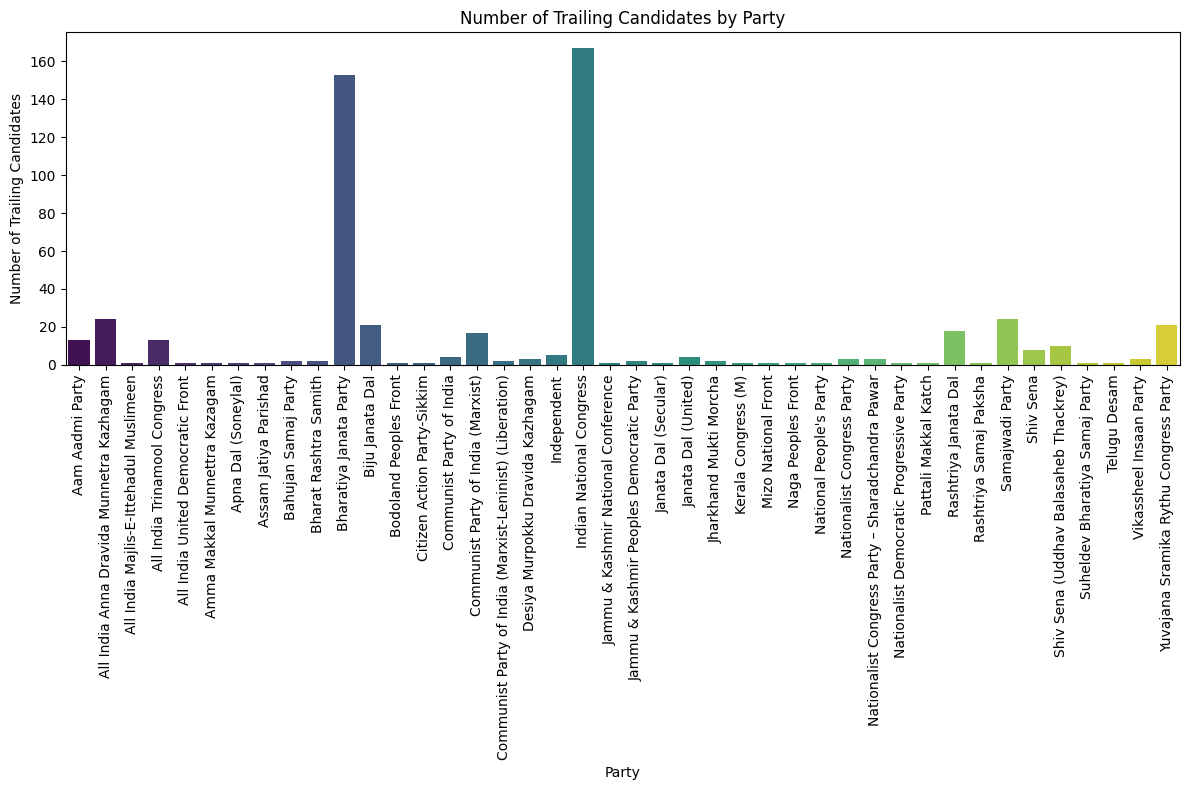

In [40]:
# Assuming 'Trailing Candidate' and 'Trailing Party' columns exist
trailing_candidates = df.groupby('Trailing Party')['Trailing Candidate'].count()

print("Number of Trailing Candidates by Party:")
print(trailing_candidates)

plt.figure(figsize=(12, 8))
sns.barplot(x=trailing_candidates.index, y=trailing_candidates.values, palette='viridis')
plt.title('Number of Trailing Candidates by Party')
plt.xlabel('Party')
plt.ylabel('Number of Trailing Candidates')
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig('trailing_candidates_by_party.png')
plt.show()


Insight 9 - Top Performing Parties in Each State

Top Performing Parties in Each State:
Constituency
AJMER                                         Bharatiya Janata Party
ALWAR                                         Bharatiya Janata Party
AMBALA                                      Indian National Congress
ANANTNAG-RAJOURI                 Jammu & Kashmir National Conference
ARAKKONAM                                  Dravida Munnetra Kazhagam
                                          ...                       
Wardha              Nationalist Congress Party – Sharadchandra Pawar
Wayanad                                     Indian National Congress
West Delhi                                    Bharatiya Janata Party
Yavatmal- Washim               Shiv Sena (Uddhav Balasaheb Thackrey)
Zahirabad                                   Indian National Congress
Name: Leading Party, Length: 541, dtype: object


<ipython-input-46-ae059906d261>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=top_parties_by_state, order=top_parties_by_state.value_counts().index, palette='viridis')


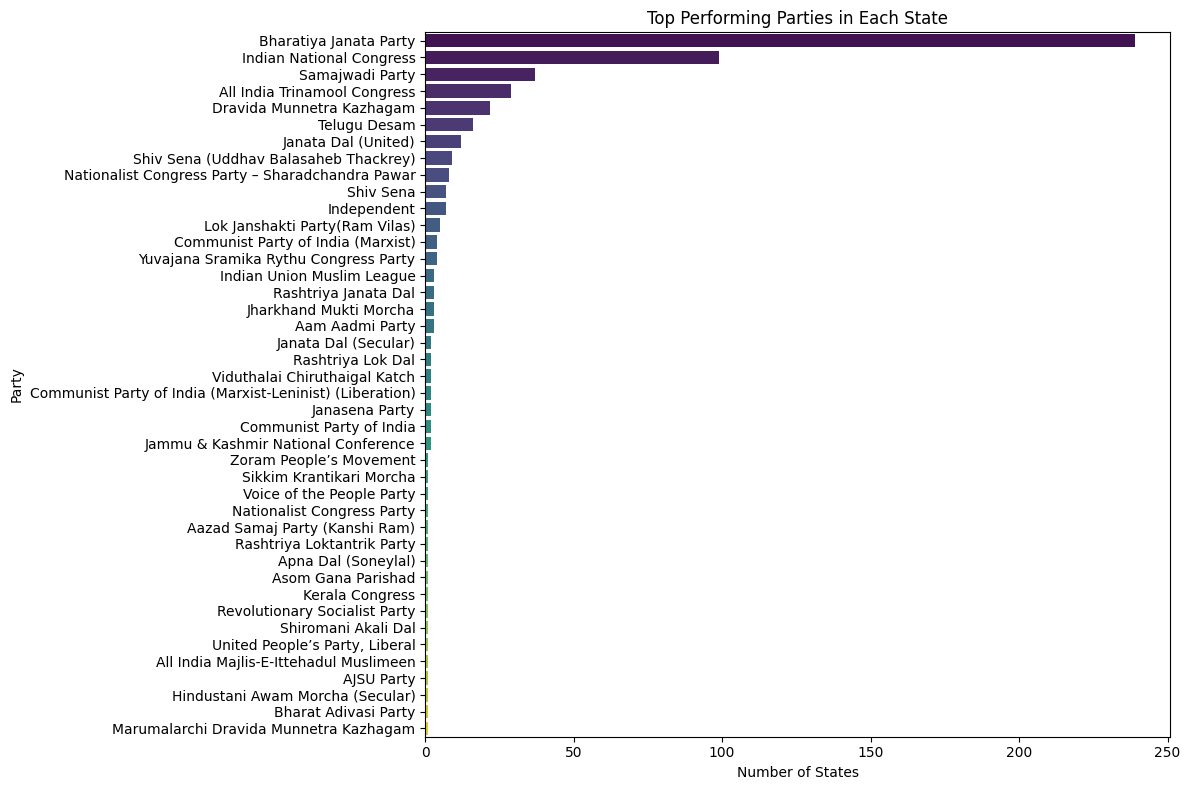

In [46]:
# Assuming 'State' and 'Party' columns
top_parties_by_state = df.groupby('Constituency')['Leading Party'].agg(lambda x: x.value_counts().index[0])

print("Top Performing Parties in Each State:")
print(top_parties_by_state)

plt.figure(figsize=(12, 8))
sns.countplot(y=top_parties_by_state, order=top_parties_by_state.value_counts().index, palette='viridis')
plt.title('Top Performing Parties in Each State')
plt.xlabel('Number of States')
plt.ylabel('Party')
plt.tight_layout()
plt.savefig('top_parties_by_state.png')
plt.show()


Insight 10 - Trailing Candidates by Party

Number of Trailing Candidates by Party:
Trailing Party
Aam Aadmi Party                                              13
All India Anna Dravida Munnetra Kazhagam                     24
All India Majlis-E-Ittehadul Muslimeen                        1
All India Trinamool Congress                                 13
All India United Democratic Front                             1
Amma Makkal Munnettra Kazagam                                 1
Apna Dal (Soneylal)                                           1
Assam Jatiya Parishad                                         1
Bahujan Samaj Party                                           2
Bharat Rashtra Samith                                         2
Bharatiya Janata Party                                      153
Biju Janata Dal                                              21
Bodoland Peoples Front                                        1
Citizen Action Party-Sikkim                                   1
Communist Party of India                         

<ipython-input-47-df9a65b62ffc>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=trailing_candidates.index, y=trailing_candidates.values, palette='viridis')


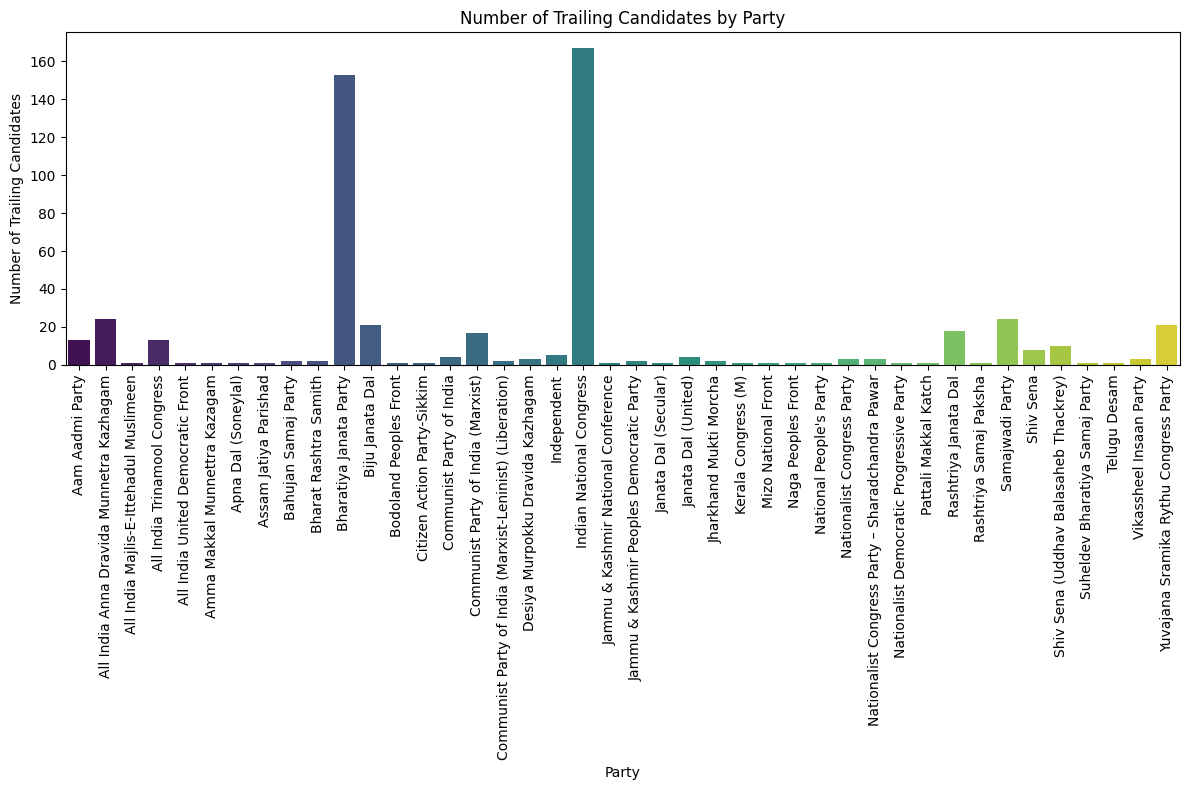

In [47]:
# Assuming 'Trailing Candidate' and 'Trailing Party' columns exist
trailing_candidates = df.groupby('Trailing Party')['Trailing Candidate'].count()

print("Number of Trailing Candidates by Party:")
print(trailing_candidates)

plt.figure(figsize=(12, 8))
sns.barplot(x=trailing_candidates.index, y=trailing_candidates.values, palette='viridis')
plt.title('Number of Trailing Candidates by Party')
plt.xlabel('Party')
plt.ylabel('Number of Trailing Candidates')
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig('trailing_candidates_by_party.png')
plt.show()
